___
# Ciência dos Dados - PROJETO 1

_Bruno Arruda Camargo Paulino Costa_

## Progresso do Acesso à TV

___
## Introdução

Esta análise tem o objetivo de avaliar os dados do PNAD no período de 2013-2015 e, apartir destes, concluir qual região e área desta região obtiveram o maior progresso no acesso a televisão; Além de determinar qual foi o tipo de TV que teve maior crescimento.


___
## Imports

In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [26]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\brune\OneDrive\Documentos\PythonScripts


___
## Análise 2013

In [27]:
dados2013=pd.read_csv('DOM2013.csv',sep=',')

dados2013.loc[(dados2013.UF<30),"Regiao"] = "Nordeste"
dados2013.loc[(dados2013.UF>=31),"Regiao"] = "Sudeste"

dados2013.loc[(dados2013.V4105<4),"Area"] = "Urbana"
dados2013.loc[(dados2013.V4105>=4),"Area"] = "Rural"

dados2013.V0226 = dados2013.V0226.astype('category')
dados2013.V02272 = dados2013.V02272.astype('category')
dados2013.V02273 = dados2013.V02273.astype('category')
dados2013.V02274 = dados2013.V02274.astype('category')
dados2013.Area = dados2013.Area.astype('category')
dados2013.Regiao = dados2013.Regiao.astype('category')
dados2013.V4620 = dados2013.V4620.astype('object')
dados2013.V4614 = dados2013.V4614.astype('object')

dados2013.V0226.cat.categories = (["Sim", "Não"])
dados2013.V02272.cat.categories = (["Sim", "Não"])
dados2013.V02273.cat.categories = (["Sim", "Não","Não Sabe"])
dados2013.V02274.cat.categories = (["Sim", "Não","Não Sabe"])

dados2013 = dados2013[pd.notnull(dados2013["V0226"])]
dados2013 = dados2013[dados2013.V4614<999999999]

wt1 = dados2013.Regiao.value_counts(sort=False) #Regiao
wt2 = dados2013.Area.value_counts(sort=False) #Area
wt4 = dados2013.V0226.value_counts(sort=False) #TV Cor
wt5 = dados2013.V02272.value_counts(sort=False) #TV Assinada
wt6 = dados2013.V02273.value_counts(sort=False) #TV Digital
wt7 = dados2013.V02274.value_counts(sort=False) #TV Parabólica

dados2013.rename(columns={"V0101":"Ano","V0226":"TVCor","V02272":"TVAssinada","V02273":"TVDigital","V02274":"TVParabólica","V4620":"Residentes","V4614":"Renda","Area":"Área","Regiao":"Região"}, inplace=True)

pd.DataFrame(dados2013.loc[21219:108605,["Ano","Região","TVCor","TVAssinada","TVDigital","TVParabólica","Área","Residentes","Renda"]])


,Ano,Região,TVCor,TVAssinada,TVDigital,TVParabólica,Área,Residentes,Renda
21219,2013,Nordeste,Sim,Não,Não Sabe,Sim,Urbana,3,4602
21220,2013,Nordeste,Sim,Não,Não,Sim,Urbana,4,1019
21221,2013,Nordeste,Sim,Não,Não,Sim,Urbana,3,1356
21223,2013,Nordeste,Sim,Não,Não,Sim,Urbana,9,2168
21224,2013,Nordeste,Sim,Não,Não,Sim,Urbana,4,632
21225,2013,Nordeste,Não,NaN,NaN,NaN,Urbana,5,2586
21229,2013,Nordeste,Sim,Não,Não,Sim,Urbana,3,230
21230,2013,Nordeste,Sim,Não,Não,Não,Urbana,6,1428
21231,2013,Nordeste,Sim,Não,Não,Não,Urbana,2,1356
21232,2013,Nordeste,Sim,Não,Não,Não,Urbana,3,678


___
## Análise 2014

In [28]:
dados2014=pd.read_csv('DOM2014.csv',sep=',')

dados2014.loc[(dados2014.UF<30),"Regiao"] = "Nordeste"
dados2014.loc[(dados2014.UF>=31),"Regiao"] = "Sudeste"

dados2014.loc[(dados2014.V4105<4),"Area"] = "Urbana"
dados2014.loc[(dados2014.V4105>=4),"Area"] = "Rural"

dados2014.V0226 = dados2014.V0226.astype('category')
dados2014.V02272 = dados2014.V02272.astype('category')
dados2014.V02273 = dados2014.V02273.astype('category')
dados2014.V02274 = dados2014.V02274.astype('category')
dados2014.Area = dados2014.Area.astype('category')
dados2014.Regiao = dados2014.Regiao.astype('category')
dados2014.V4620 = dados2014.V4620.astype('object')
dados2014.V4614 = dados2014.V4614.astype('object')

dados2014.V0226.cat.categories = (["Sim", "Não"])
dados2014.V02272.cat.categories = (["Sim", "Não"])
dados2014.V02273.cat.categories = (["Sim", "Não","Não Sabe"])
dados2014.V02274.cat.categories = (["Sim", "Não","Não Sabe"])

dados2014 = dados2014[pd.notnull(dados2014["V0226"])]
dados2014 = dados2014[dados2014.V4614<999999999]

vt1 = dados2014.Regiao.value_counts(sort=False) #Regiao
vt2 = dados2014.Area.value_counts(sort=False) #Area
vt4 = dados2014.V0226.value_counts(sort=False) #TV Cor
vt5 = dados2014.V02272.value_counts(sort=False) #TV Assinada
vt6 = dados2014.V02273.value_counts(sort=False) #TV Digital
vt7 = dados2014.V02274.value_counts(sort=False) #TV Parabólica

dados2014.rename(columns={"V0101":"Ano","V0226":"TVCor","V02272":"TVAssinada","V02273":"TVDigital","V02274":"TVParabólica","V4620":"Residentes","V4614":"Renda","Area":"Área","Regiao":"Região"}, inplace=True)

pd.DataFrame(dados2014.loc[21431:110539,["Ano","Região","TVCor","TVAssinada","TVDigital","TVParabólica","Área","Residentes","Renda"]])


,Ano,Região,TVCor,TVAssinada,TVDigital,TVParabólica,Área,Residentes,Renda
21431,2014,Nordeste,Sim,Não,Sim,Sim,Urbana,3,2500
21432,2014,Nordeste,Sim,Não,Não,Sim,Urbana,3,1500
21434,2014,Nordeste,Sim,Não,Não,Sim,Urbana,3,724
21435,2014,Nordeste,Sim,Não,Não,Sim,Urbana,3,2500
21436,2014,Nordeste,Sim,Não,Não,Sim,Urbana,2,2450
21437,2014,Nordeste,Sim,Não,Não,Sim,Urbana,6,1843
21438,2014,Nordeste,Sim,Não,Não,Sim,Urbana,7,871
21439,2014,Nordeste,Sim,Não,Não,Sim,Urbana,2,477
21440,2014,Nordeste,Sim,Não,Sim,Sim,Urbana,4,747
21441,2014,Nordeste,Sim,Não,Não,Sim,Urbana,4,876


___
## Análise 2015

In [29]:
dados2015=pd.read_csv('DOM2015.csv',sep=',')

dados2015.loc[(dados2015.UF<30),"Regiao"] = "Nordeste"
dados2015.loc[(dados2015.UF>=31),"Regiao"] = "Sudeste"

dados2015.loc[(dados2015.V4105<4),"Area"] = "Urbana"
dados2015.loc[(dados2015.V4105>=4),"Area"] = "Rural"

dados2015.V0226 = dados2015.V0226.astype('category')
dados2015.V02272 = dados2015.V02272.astype('category')
dados2015.V02273 = dados2015.V02273.astype('category')
dados2015.V02274 = dados2015.V02274.astype('category')
dados2015.Area = dados2015.Area.astype('category')
dados2015.Regiao = dados2015.Regiao.astype('category')
dados2015.V4620 = dados2015.V4620.astype('object')
dados2015.V4614 = dados2015.V4614.astype('object')

dados2015.V0226.cat.categories = (["Sim", "Não"])
dados2015.V02272.cat.categories = (["Sim", "Não"])
dados2015.V02273.cat.categories = (["Sim", "Não","Não Sabe"])
dados2015.V02274.cat.categories = (["Sim", "Não","Não Sabe"])

dados2015 = dados2015[pd.notnull(dados2015["V0226"])]
dados2015 = dados2015[dados2015.V4614<999999999]

ut1 = dados2015.Regiao.value_counts(sort=False) #Regiao
ut2 = dados2015.Area.value_counts(sort=False) #Area
ut4 = dados2015.V0226.value_counts(sort=False) #TV Cor
ut5 = dados2015.V02272.value_counts(sort=False) #TV Assinada
ut6 = dados2015.V02273.value_counts(sort=False) #TV Digital
ut7 = dados2015.V02274.value_counts(sort=False) #TV Parabólica

dados2015.rename(columns={"V0101":"Ano","V0226":"TVCor","V02272":"TVAssinada","V02273":"TVDigital","V02274":"TVParabólica","V4620":"Residentes","V4614":"Renda","Area":"Área","Regiao":"Região"}, inplace=True)

pd.DataFrame(dados2015.loc[21442:110421,["Ano","Região","TVCor","TVAssinada","TVDigital","TVParabólica","Área","Residentes","Renda"]])

,Ano,Região,TVCor,TVAssinada,TVDigital,TVParabólica,Área,Residentes,Renda
21442,2015,Nordeste,Sim,Não,Não,Não,Urbana,1,1576
21443,2015,Nordeste,Sim,Não,Não,Sim,Urbana,2,788
21444,2015,Nordeste,Sim,Não,Não,Sim,Urbana,5,2182
21447,2015,Nordeste,Sim,Não,Não,Sim,Urbana,12,755
21448,2015,Nordeste,Sim,Não,Não,Sim,Urbana,7,1313
21449,2015,Nordeste,Sim,Não,Não Sabe,Sim,Urbana,3,732
21450,2015,Nordeste,Sim,Não,Não,Sim,Urbana,3,455
21451,2015,Nordeste,Sim,Não,Não,Sim,Urbana,1,1900
21452,2015,Nordeste,Sim,Sim,Não,Não,Urbana,2,4590
21454,2015,Nordeste,Sim,Não,Não,Sim,Urbana,4,1678


___
## Gráficos 2013

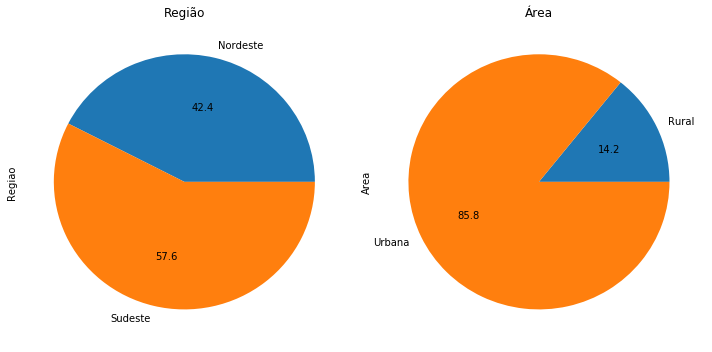

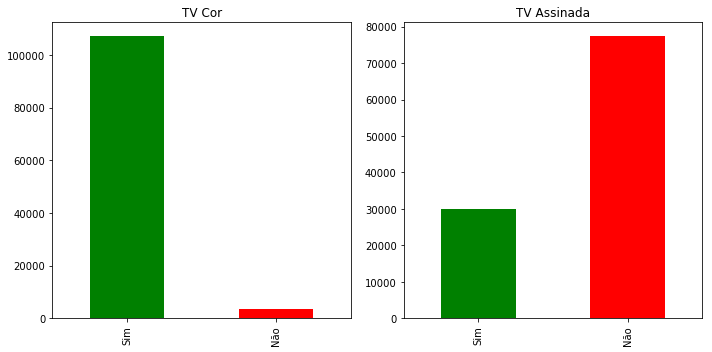

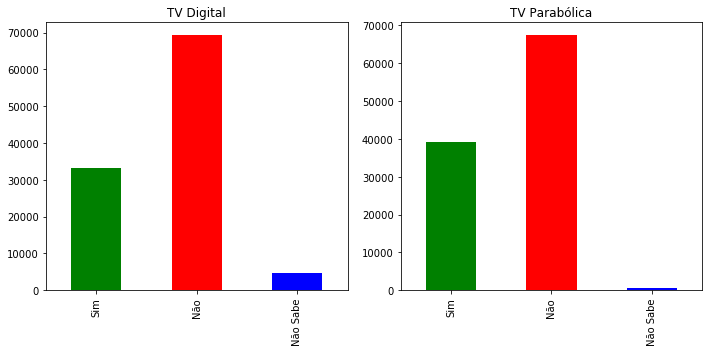

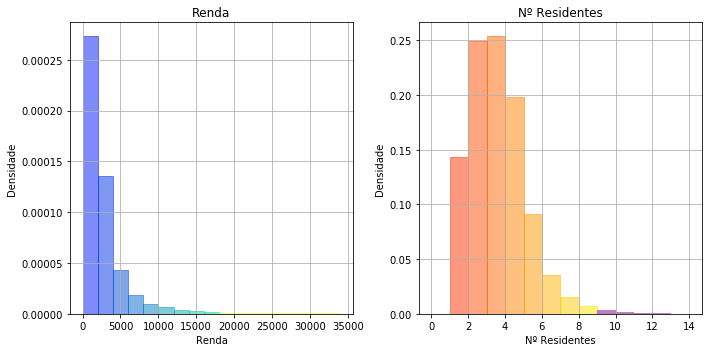

In [30]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = wt1.plot(kind='pie',title='Região',autopct='%.1f')

plt.subplot(122)
plot = wt2.plot(kind='pie',title='Área',autopct='%.1f')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = wt4.plot(kind='bar',title='TV Cor',figsize=(10, 5),color=('g','r'))

plt.subplot(122)
plot = wt5.plot(kind='bar',title='TV Assinada',figsize=(10, 5),color=('g','r'))

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = wt6.plot(kind='bar',title='TV Digital',figsize=(10, 5),color=('g','r','b'))

plt.subplot(122)
plot = wt7.plot(kind='bar',title='TV Parabólica',figsize=(10, 5),color=('g','r','b'))

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
faixa=np.arange(0,35000,2000)
plot = dados2013.Renda.plot.hist(bins=faixa,title='Renda', normed=1, alpha=0.5,color="yellow",sharex=True, sharey=True)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.grid()

cm = plt.cm.get_cmap('winter')
cmz=np.arange(0,1,0.1)
for c,z in zip(faixa,cmz):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    bar_value_to_label = c
    for i, rectangle in enumerate(plot.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    plot.patches[index_of_bar_to_label].set_color(cm(z))

plt.subplot(122)
faixa1=np.arange(0,15,1)
plot = dados2013.Residentes.plot.hist(bins=faixa1,title='Nº Residentes', normed=1, alpha=0.5,color="purple")
plt.ylabel('Densidade')
plt.xlabel('Nº Residentes')
plt.grid()

cm = plt.cm.get_cmap('autumn')
cmz=np.arange(0,1,0.1)
for c,z in zip(faixa1,cmz):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    bar_value_to_label = c
    for i, rectangle in enumerate(plot.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    plot.patches[index_of_bar_to_label].set_color(cm(z))

plt.tight_layout()
plt.show()


___
## Gráficos 2014

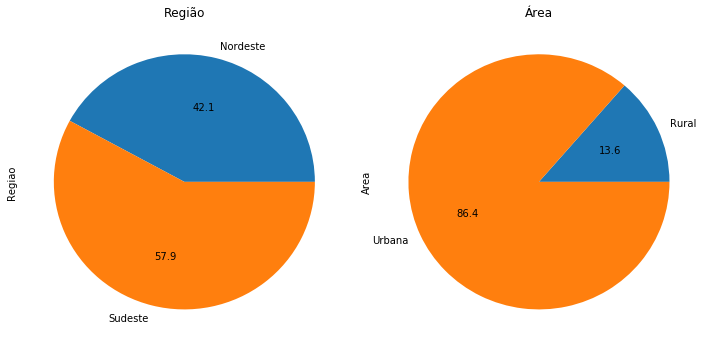

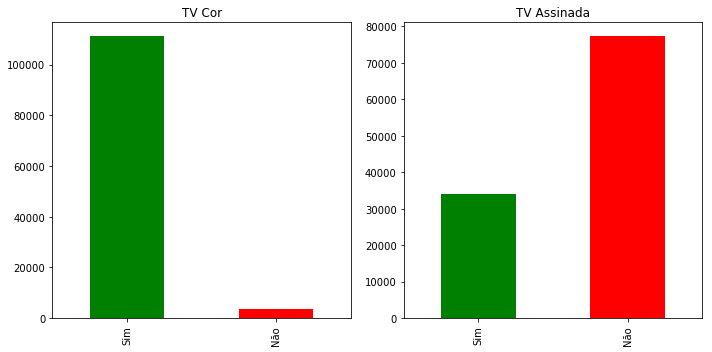

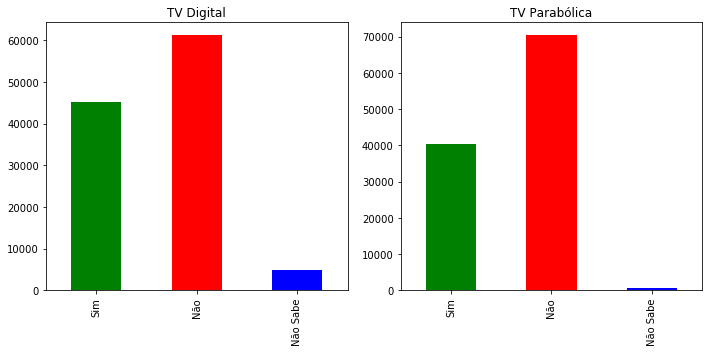

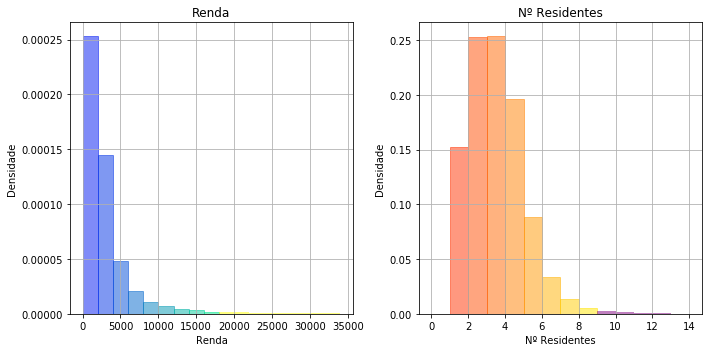

In [31]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = vt1.plot(kind='pie',title='Região',autopct='%.1f')

plt.subplot(122)
plot = vt2.plot(kind='pie',title='Área',autopct='%.1f')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = vt4.plot(kind='bar',title='TV Cor',figsize=(10, 5),color=('g','r'))

plt.subplot(122)
plot = vt5.plot(kind='bar',title='TV Assinada',figsize=(10, 5),color=('g','r'))

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = vt6.plot(kind='bar',title='TV Digital',figsize=(10, 5),color=('g','r','b'))

plt.subplot(122)
plot = vt7.plot(kind='bar',title='TV Parabólica',figsize=(10, 5),color=('g','r','b'))

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
faixa=np.arange(0,35000,2000)
plot = dados2014.Renda.plot.hist(bins=faixa,title='Renda', normed=1, alpha=0.5,color="yellow")
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.grid()

cm = plt.cm.get_cmap('winter')
cmz=np.arange(0,1,0.1)
for c,z in zip(faixa,cmz):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    bar_value_to_label = c
    for i, rectangle in enumerate(plot.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    plot.patches[index_of_bar_to_label].set_color(cm(z))

plt.subplot(122)
faixa1=np.arange(0,15,1)
plot = dados2014.Residentes.plot.hist(bins=faixa1,title='Nº Residentes', normed=1, alpha=0.5,color="purple")
plt.ylabel('Densidade')
plt.xlabel('Nº Residentes')
plt.grid()

cm = plt.cm.get_cmap('autumn')
cmz=np.arange(0,1,0.1)
for c,z in zip(faixa1,cmz):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    bar_value_to_label = c
    for i, rectangle in enumerate(plot.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    plot.patches[index_of_bar_to_label].set_color(cm(z))

plt.tight_layout()
plt.show()

___
## Gráficos 2015

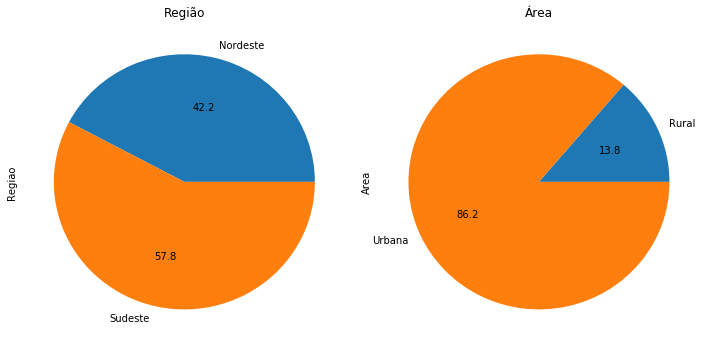

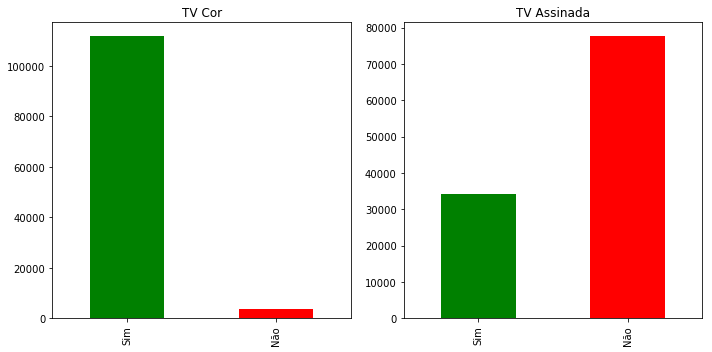

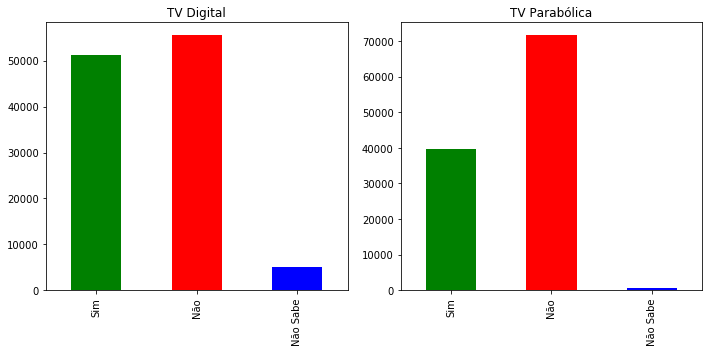

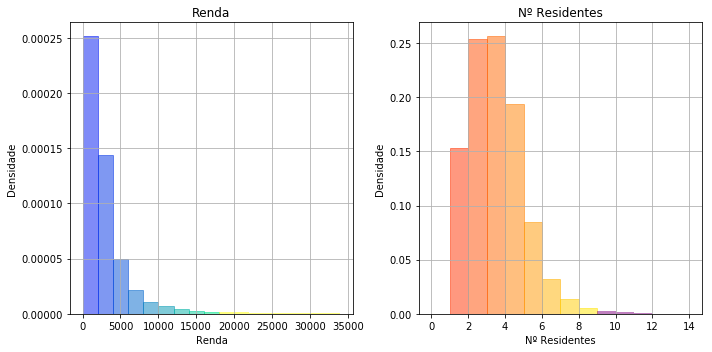

In [32]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = ut1.plot(kind='pie',title='Região',autopct='%.1f')

plt.subplot(122)
plot = ut2.plot(kind='pie',title='Área',autopct='%.1f')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = ut4.plot(kind='bar',title='TV Cor',figsize=(10, 5),color=('g','r'))

plt.subplot(122)
plot = ut5.plot(kind='bar',title='TV Assinada',figsize=(10, 5),color=('g','r'))

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = ut6.plot(kind='bar',title='TV Digital',figsize=(10, 5),color=('g','r','b'))

plt.subplot(122)
plot = ut7.plot(kind='bar',title='TV Parabólica',figsize=(10, 5),color=('g','r','b'))

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
faixa=np.arange(0,35000,2000)
plot = dados2015.Renda.plot.hist(bins=faixa,title='Renda', normed=1, alpha=0.5,color="yellow")
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.grid()

cm = plt.cm.get_cmap('winter')
cmz=np.arange(0,1,0.1)
for c,z in zip(faixa,cmz):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    bar_value_to_label = c
    for i, rectangle in enumerate(plot.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    plot.patches[index_of_bar_to_label].set_color(cm(z))

plt.subplot(122)
faixa1=np.arange(0,15,1)
plot = dados2015.Residentes.plot.hist(bins=faixa1,title='Nº Residentes', normed=1, alpha=0.5,color="purple")
plt.ylabel('Densidade')
plt.xlabel('Nº Residentes')
plt.grid()

cm = plt.cm.get_cmap('autumn')
cmz=np.arange(0,1,0.1)
for c,z in zip(faixa1,cmz):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    bar_value_to_label = c
    for i, rectangle in enumerate(plot.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    plot.patches[index_of_bar_to_label].set_color(cm(z))

plt.tight_layout()
plt.show()

___
## Cruzando Dados 2013

In [33]:
yt=pd.crosstab(dados2013.Região, dados2013.Área, margins=True, rownames=['Região'], colnames=['Área'], normalize=True)*100
yt=yt.round(decimals=1)
#yt

In [34]:
yt1=pd.crosstab(dados2013.Região, dados2013.TVCor, margins=True, rownames=['Região'], colnames=['TV Cor'], normalize=True)*100
yt1=yt1.round(decimals=1)
#yt1

In [35]:
yt2=pd.crosstab(dados2013.Região, dados2013.TVAssinada, margins=True, rownames=['Região'], colnames=['TV Assinada'], normalize=True)*100
yt2=yt2.round(decimals=1)
#yt2

In [36]:
yt3=pd.crosstab(dados2013.Região, dados2013.TVDigital, margins=True, rownames=['Região'], colnames=['TV Digital'], normalize=True)*100
yt3=yt3.round(decimals=1)
#yt3

In [37]:
yt4=pd.crosstab(dados2013.Região, dados2013.TVParabólica, margins=True, rownames=['Região'], colnames=['TV Parabólica'], normalize=True)*100
yt4=yt4.round(decimals=1)
#yt4

In [38]:
dt1=pd.crosstab(dados2013.Área, dados2013.TVCor, margins=True, rownames=['Área'], colnames=['TV Cor'], normalize=True)*100
dt1=dt1.round(decimals=1)
#dt1

In [39]:
dt2=pd.crosstab(dados2013.Área, dados2013.TVAssinada, margins=True, rownames=['Área'], colnames=['TV Assinada'], normalize=True)*100
dt2=dt2.round(decimals=1)
#dt2

In [40]:
dt3=pd.crosstab(dados2013.Área, dados2013.TVDigital, margins=True, rownames=['Área'], colnames=['TV Digital'], normalize=True)*100
dt3=dt3.round(decimals=1)
#dt3

In [41]:
dt4=pd.crosstab(dados2013.Área, dados2013.TVParabólica, margins=True, rownames=['Área'], colnames=['TV Parabólica'], normalize=True)*100
dt4=dt4.round(decimals=1)
#dt4

___
## Cruzando Dados 2014

In [42]:
xt=pd.crosstab(dados2014.Região, dados2014.Área, margins=True, rownames=['Região'], colnames=['Área'], normalize=True)*100
xt=xt.round(decimals=1)
#xt

In [43]:
xt1=pd.crosstab(dados2014.Região, dados2014.TVCor, margins=True, rownames=['Região'], colnames=['TV Cor'], normalize=True)*100
xt1=xt1.round(decimals=1)
#xt1

In [44]:
xt2=pd.crosstab(dados2014.Região, dados2014.TVAssinada, margins=True, rownames=['Região'], colnames=['TV Assinada'], normalize=True)*100
xt2=xt2.round(decimals=1)
#xt2

In [45]:
xt3=pd.crosstab(dados2014.Região, dados2014.TVDigital, margins=True, rownames=['Região'], colnames=['TV Digital'], normalize=True)*100
xt3=xt3.round(decimals=1)
#xt3

In [46]:
xt4=pd.crosstab(dados2014.Região, dados2014.TVParabólica, margins=True, rownames=['Região'], colnames=['TV Parabólica'], normalize=True)*100
xt4=xt4.round(decimals=1)
#xt4

In [47]:
bt1=pd.crosstab(dados2014.Área, dados2014.TVCor, margins=True, rownames=['Área'], colnames=['TV Cor'], normalize=True)*100
bt1=bt1.round(decimals=1)
#bt1

In [48]:
bt2=pd.crosstab(dados2014.Área, dados2014.TVAssinada, margins=True, rownames=['Área'], colnames=['TV Assinada'], normalize=True)*100
bt2=bt2.round(decimals=1)
#bt2

In [49]:
bt3=pd.crosstab(dados2014.Área, dados2014.TVDigital, margins=True, rownames=['Área'], colnames=['TV Digital'], normalize=True)*100
bt3=bt3.round(decimals=1)
#bt3

In [50]:
bt4=pd.crosstab(dados2014.Área, dados2014.TVParabólica, margins=True, rownames=['Área'], colnames=['TV Parabólica'], normalize=True)*100
bt4=bt4.round(decimals=1)
#bt4

___
## Cruzando Dados 2015

In [51]:
ct=pd.crosstab(dados2015.Região, dados2015.Área, margins=True, rownames=['Região'], colnames=['Área'], normalize=True)*100
ct=ct.round(decimals=1)
#ct

In [52]:
ct1=pd.crosstab(dados2015.Região, dados2015.TVCor, margins=True, rownames=['Região'], colnames=['TV Cor'], normalize=True)*100
ct1=ct1.round(decimals=1)
#ct1

In [53]:
ct2=pd.crosstab(dados2015.Região, dados2015.TVAssinada, margins=True, rownames=['Região'], colnames=['TV Assinada'], normalize=True)*100
ct2=ct2.round(decimals=1)
#ct2

In [54]:
ct3=pd.crosstab(dados2015.Região, dados2015.TVDigital, margins=True, rownames=['Região'], colnames=['TV Digital'], normalize=True)*100
ct3=ct3.round(decimals=1)
#ct3

In [55]:
ct4=pd.crosstab(dados2015.Região, dados2015.TVParabólica, margins=True, rownames=['Região'], colnames=['TV Parabólica'], normalize=True)*100
ct4=ct4.round(decimals=1)
#ct4

In [56]:
at1=pd.crosstab(dados2015.Área, dados2015.TVCor, margins=True, rownames=['Área'], colnames=['TV Cor'], normalize=True)*100
at1=at1.round(decimals=1)
#at1

In [57]:
at2=pd.crosstab(dados2015.Área, dados2015.TVAssinada, margins=True, rownames=['Área'], colnames=['TV Assinada'], normalize=True)*100
at2=at2.round(decimals=1)
#at2

In [58]:
at3=pd.crosstab(dados2015.Área, dados2015.TVDigital, margins=True, rownames=['Área'], colnames=['TV Digital'], normalize=True)*100
at3=at3.round(decimals=1)
#at3

In [59]:
at4=pd.crosstab(dados2015.Área, dados2015.TVParabólica, margins=True, rownames=['Área'], colnames=['TV Parabólica'], normalize=True)*100
at4=at4.round(decimals=1)
#at4

___
## Gráficos Cruzados

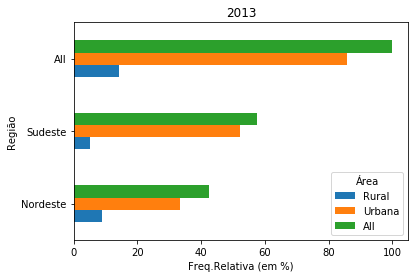

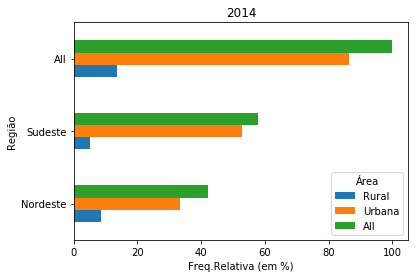

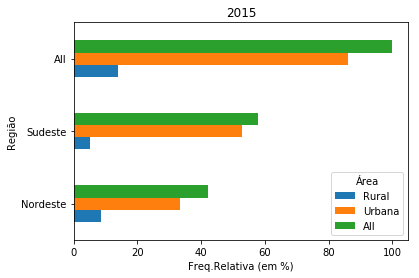

In [60]:
plot = yt.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2013")

plot = xt.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2014")

plot = ct.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2015")

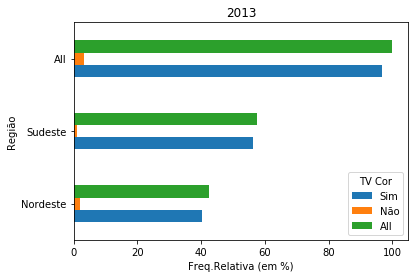

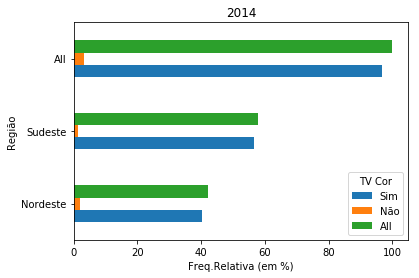

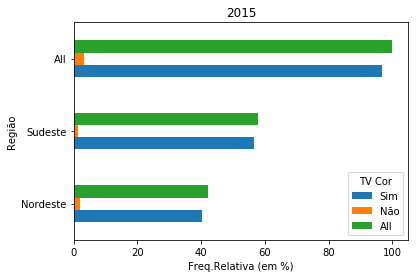

In [61]:
plot = yt1.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2013")

plot = xt1.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2014")

plot = ct1.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2015")

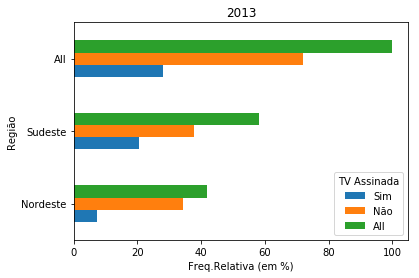

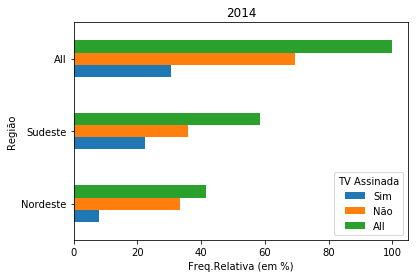

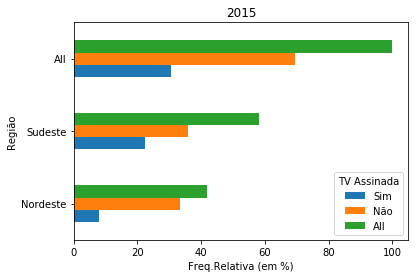

In [62]:
plot = yt2.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2013")

plot = xt2.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2014")

plot = ct2.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2015")

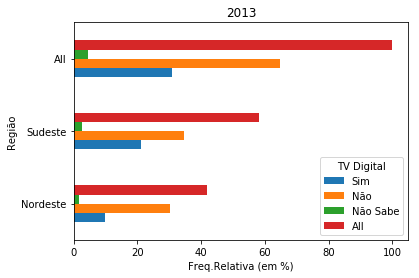

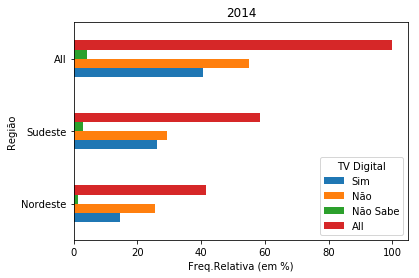

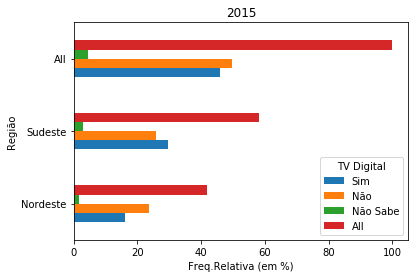

In [63]:
plot = yt3.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2013")

plot = xt3.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2014")

plot = ct3.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2015")

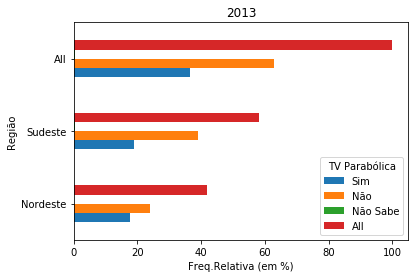

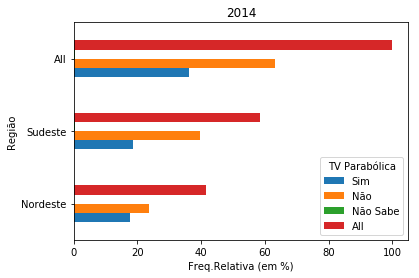

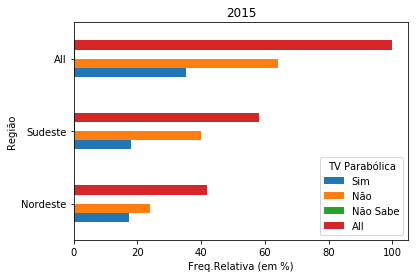

In [64]:
plot = yt4.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2013")

plot = xt4.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2014")

plot = ct4.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2015")

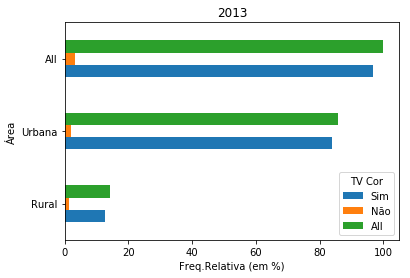

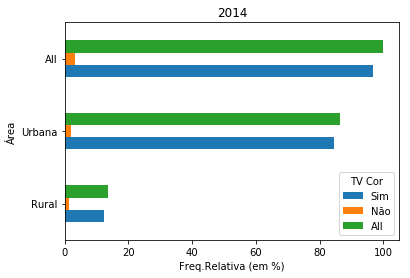

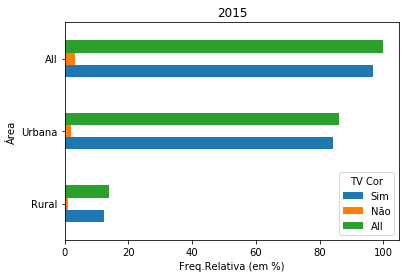

In [65]:
plot = dt1.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2013")

plot = bt1.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2014")

plot = at1.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2015")

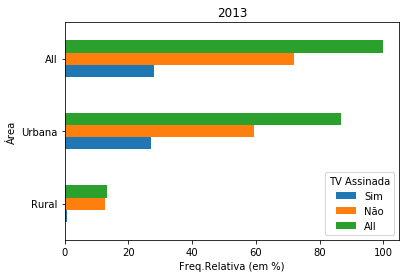

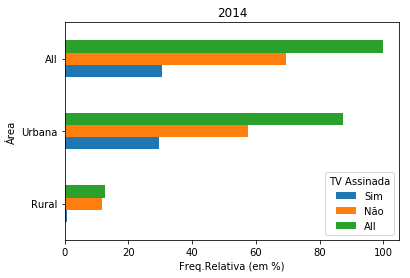

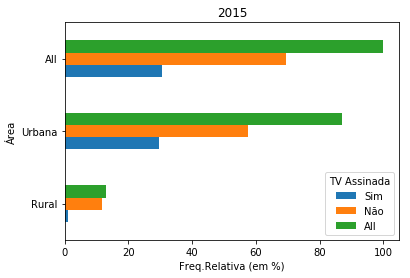

In [66]:
plot = dt2.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2013")

plot = bt2.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2014")

plot = at2.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2015")

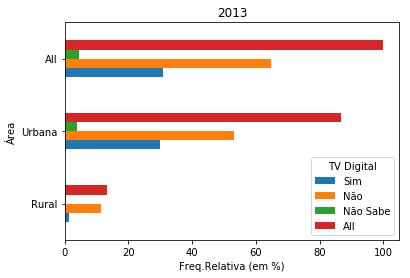

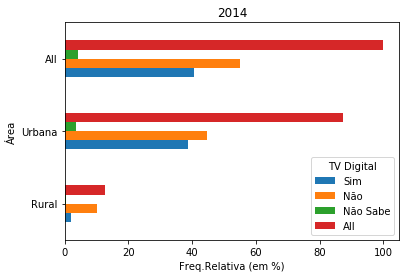

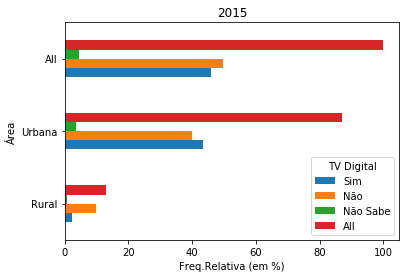

In [67]:
plot = dt3.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2013")

plot = bt3.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2014")

plot = at3.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2015")

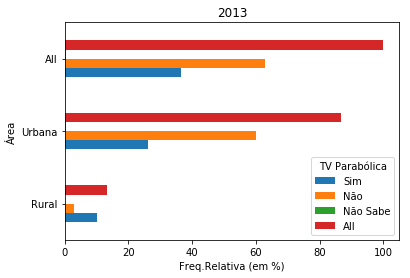

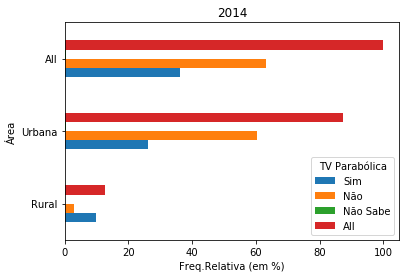

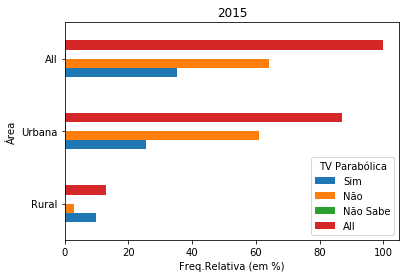

In [68]:
plot = dt4.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2013")

plot = bt4.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2014")

plot = at4.plot(kind='barh')
plt.xlabel('Freq.Relativa (em %)')
plt.title("2015")

___
## Conclusão 

Descreva aqui suas conclusões!